In this tutorial, we will train a very simple autoencodeer.
We discretize a function in `N_points` and give it as input to the autoencoder. 
We want the output to be the function itself.
However, since there is a very small layer in the middle of the autoencoder (_bottleneck_), the task is not trivial. 
In other words, the central layer will contain a compressed representation of the function.
In particular, we choose a set of random gaussians with different mean $\mu$ and standard deviation $\sigma$ as functions. 

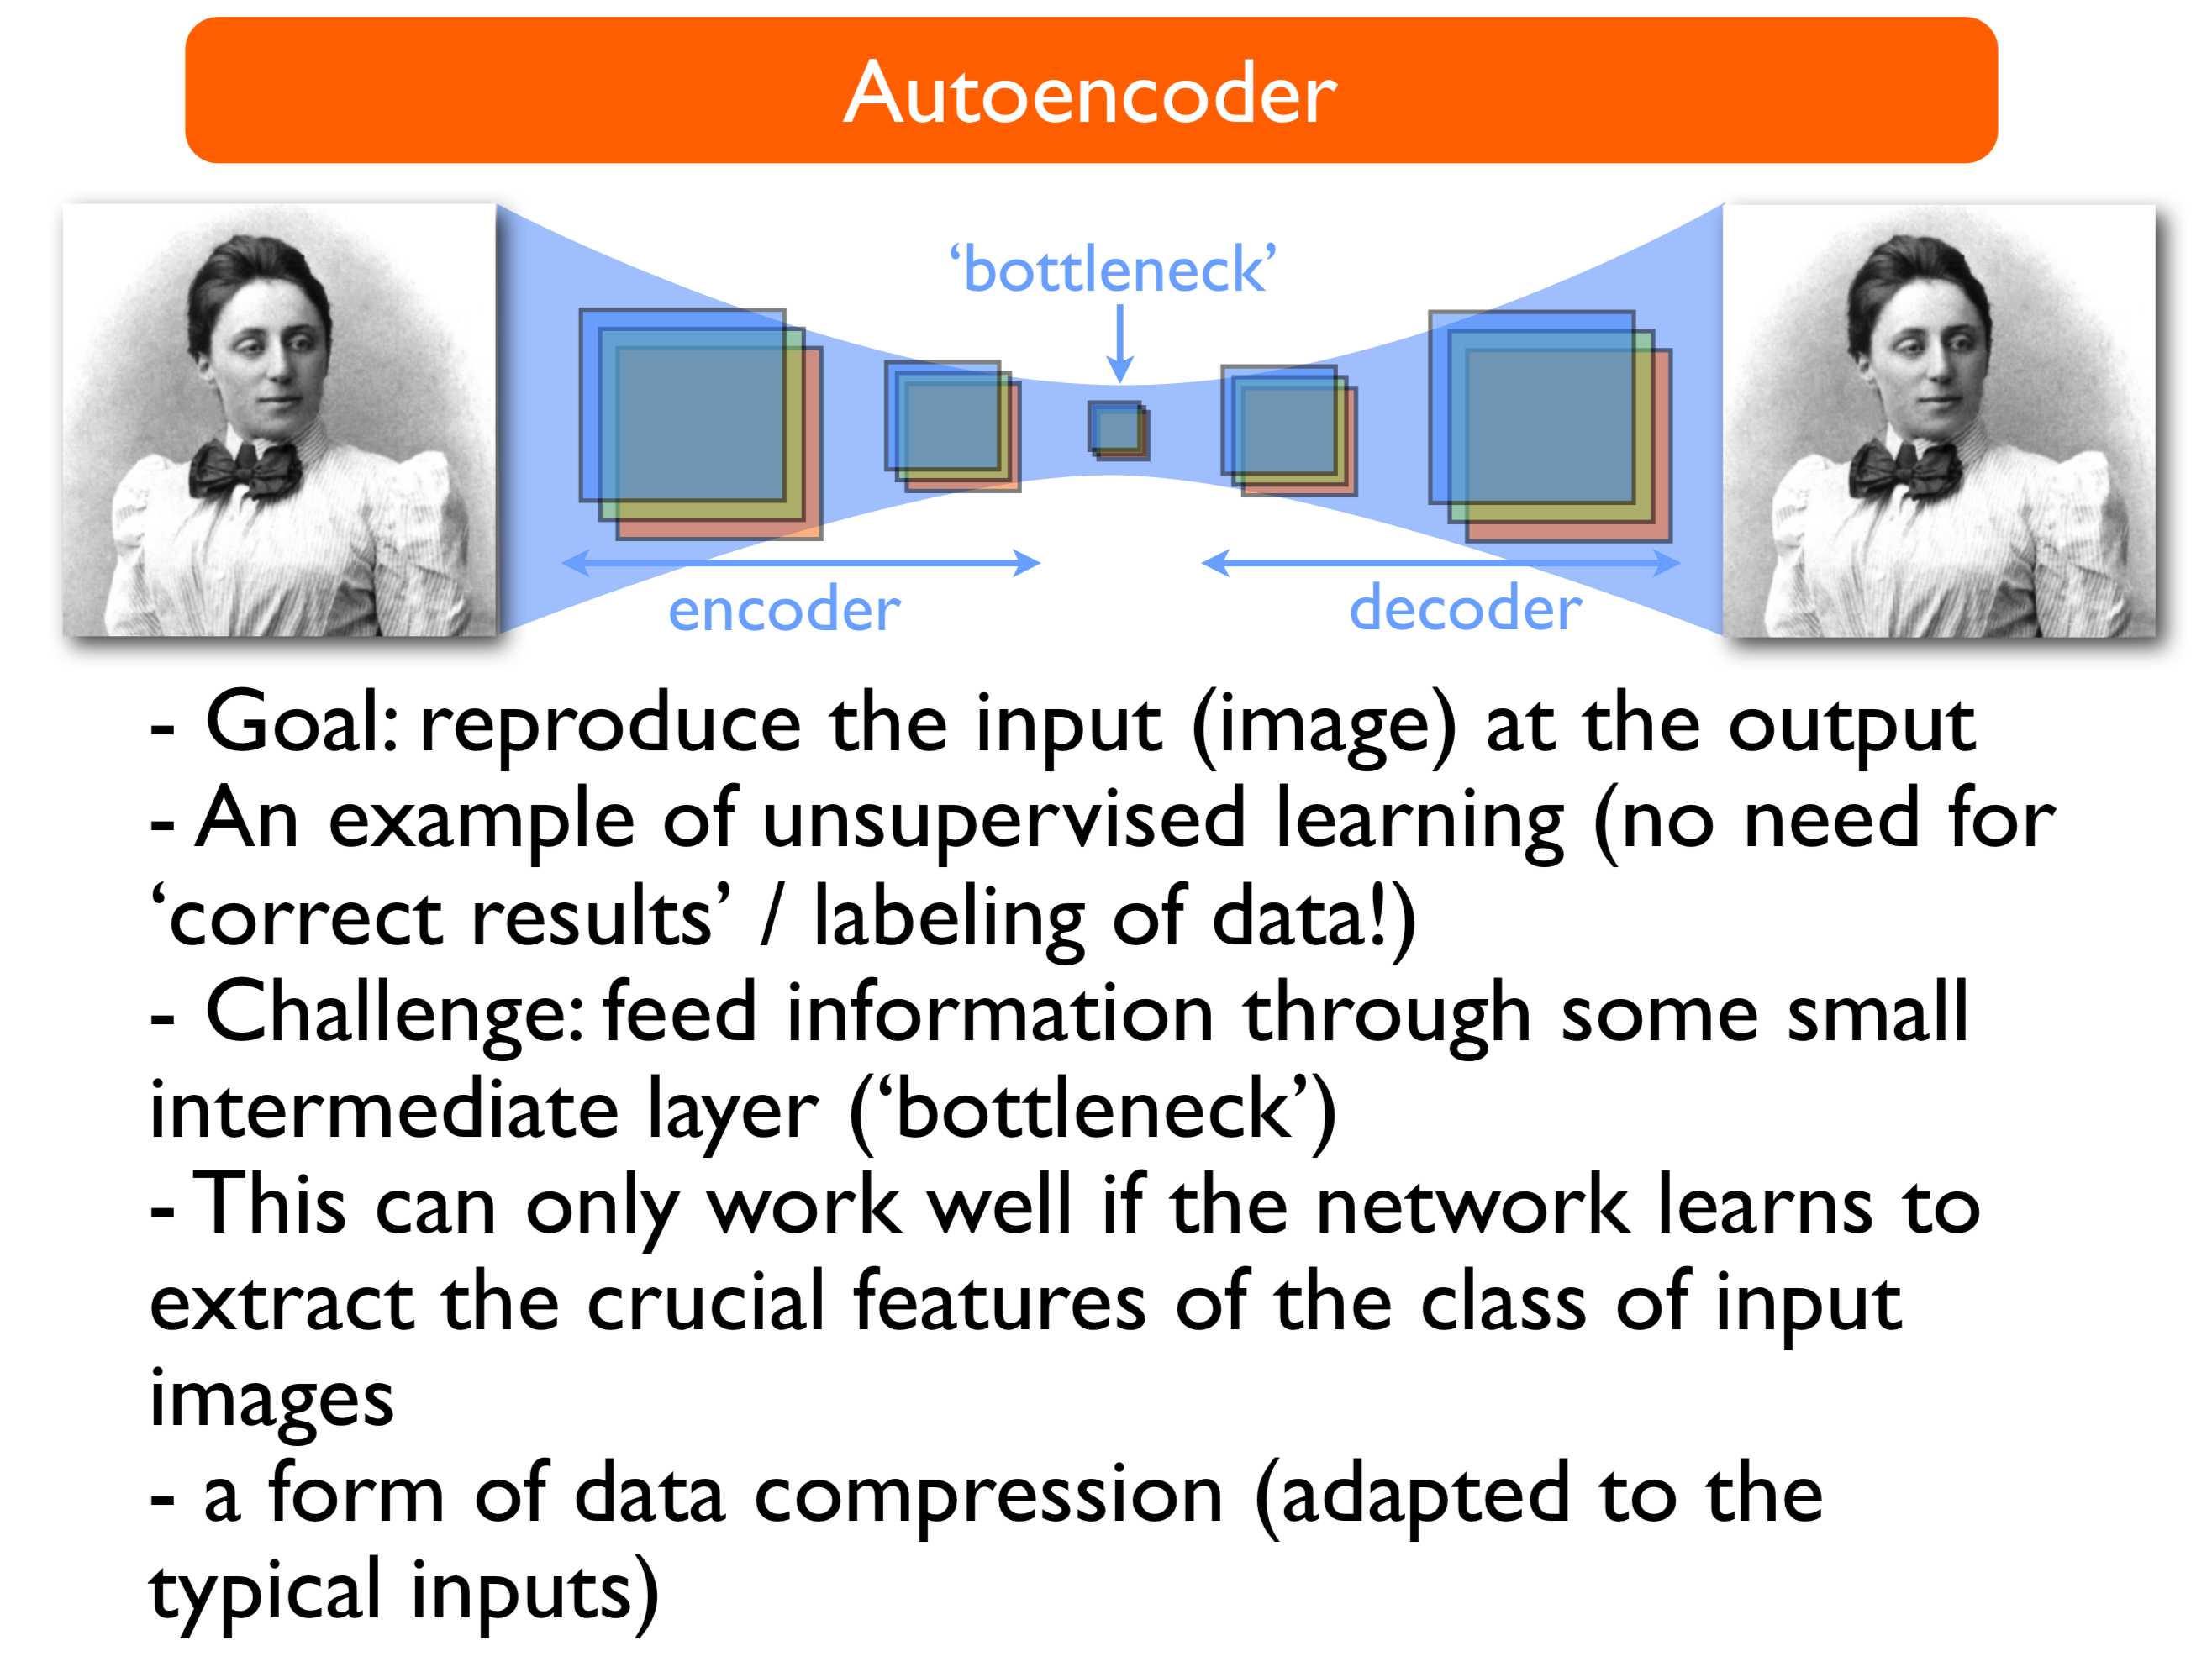

# Import libraries

In [1]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

---

# Create samples batches

Write a function that generates `N_batch` functions, each one discretized in `N_points` between `xmin` and `xmax`.
Extract a different $\mu$ and $\sigma$ for each gaussian.

In [3]:
xmin = -10.
xmax = 10.

sigma_min = 1
sigma_max = 5

mu_min = -2
mu_max = 2

N_points = 100
N_batch=1000

In [4]:
def get_batch(N_batch):
    mu = .....................................................
    sigma = .....................................................
    
    x = .....................................................
    
    return 1/np.sqrt(2*np.pi* sigma**2)*np.exp(-0.5*((x-mu)/sigma)**2)

## Check the generated functions: 
create a plot that shows a few random generated gaussians.

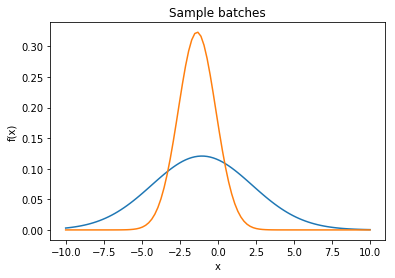

In [6]:
x = .....................................................
y1 = .....................................................
y2 = .....................................................
plt.figure()
plt.title("Sample batches")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(.....................................................)
plt.plot(.....................................................)
plt.show()

---

# Create the neural network

Define a fully connected neural network in Keras with the following structure

`input` $> 90 > 50 > 2 >50 >90> $ `output`

The layer with $2$ neurons is the bottleneck!

Compile the network with the approriate loss function and with a convenient optimizer.

In [7]:
def create_net():
    net = .....................................................
    
    .....................................................
    .....................................................
    .....................................................
    .....................................................
    .....................................................
    
    net.compile(.....................................................)
    
    net.summary()

    return net

In [2]:
net = create_net()
costs = []

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                4550      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_8 (Dense)              (None, 90)                4590      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               9100      
Total params: 27,582
Trainable params: 27,582
Non-trainable params: 0
_________________________________________________________________


---

# Train the neural network

Train the neural network for a reasonable number of epochs. 
Save the value of the cost function at each step in order to plot it after the training.

In [ ]:
N_epochs = .....................................................

.....................................................
.....................................................
.....................................................
.....................................................
    

Plot the cost function

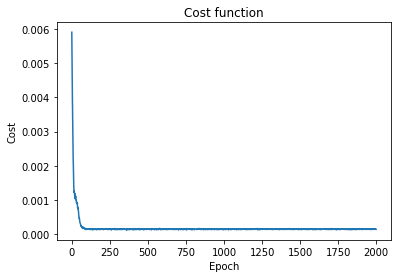

In [39]:
plt.figure()
plt.title(.....................................................)
plt.xlabel(.....................................................)
plt.ylabel(.....................................................)
plt.plot(.....................................................)
plt.show()

Check the results on some random samples

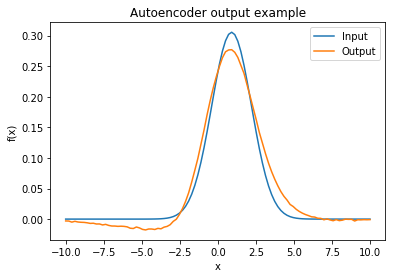

In [43]:
x = .....................................................

input_sample = .....................................................
output_sample = .....................................................

plt.figure()
plt.title(".....................")
plt.plot(x,.....................................................,
         label=".....................")
plt.plot(x,.....................................................,
         label=".....................")
plt.xlabel(".....................")
plt.ylabel(".....................")
plt.legend()
plt.show()

---

# Analyze the network

Inspect the bottleneck to understand eventual correlation with the mu and sigma of the gaussian.

Go back to the `create_net()` function and create a submodel which returns the first part of the network.
You can use the function `K.Model` and identify the desired output layer with `net.get_layer()`.
Please name the bottleneck layer with the argument `name=` in order to be able to access to it again.

`encoder_net = K.Model(inputs=net.input, outputs=net.get_layer("bottleneck").output)`

`net_out` will be the output of the encoder part of the autoencoder (`encoder_net`).
In order to create a bidimensional color plot of the plane $\sigma - \mu$, we want it to have a dimension:
`N_points x N_points x 2`.

In [3]:
encoder_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 90)                9090      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4550      
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 102       
Total params: 13,742
Trainable params: 13,742
Non-trainable params: 0
_________________________________________________________________


In [44]:
mu = np.linspace(mu_min,mu_max,N_points)
sigma = np.linspace(sigma_min, sigma_max, N_points)

mu_grid, sigma_grid = np.meshgrid(mu, sigma)
mu_mesh = mu_grid.reshape([-1,1])
sigma_mesh = sigma_grid.reshape([-1,1])

x = np.linspace(xmin,xmax,N_points).reshape([1,-1])
    
x_in = 1/np.sqrt(2*np.pi* sigma_mesh**2)*np.exp(-0.5*((x-mu_mesh)/sigma_mesh)**2)

net_out = .....................................................

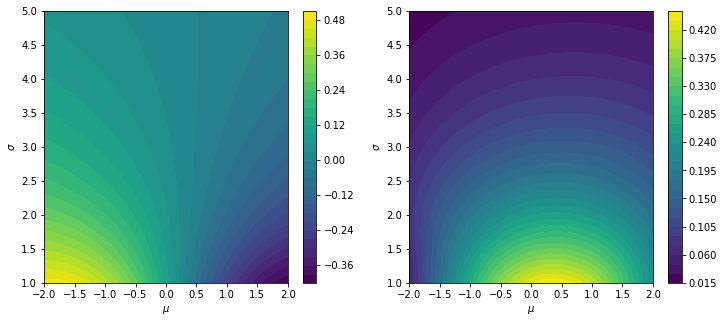

In [5]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.contourf(mu_grid, sigma_grid, net_out[:,:,0],30)
plt.colorbar()
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")

plt.subplot(1,2,2)
plt.contourf(mu_grid, sigma_grid, net_out[:,:,1],30)
plt.colorbar()
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")
plt.show()

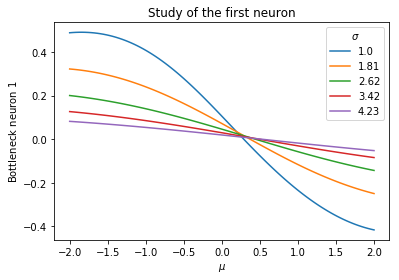

In [3]:
plt.figure()
plt.title("Study of the first neuron")
plt.xlabel(r"$\mu$")
plt.ylabel(r"Bottleneck neuron $1$")
for i in range(0,100,20):
    plt.plot(mu, net_out[i,:,0], label=np.round(sigma[i],2))
    
    
plt.legend(title=r"$\sigma$")
plt.show()

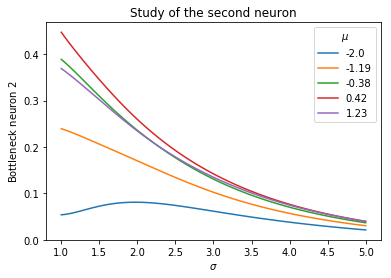

In [4]:
plt.figure()
plt.title("Study of the second neuron")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"Bottleneck neuron $2$")
for i in range(0,100,20):
    plt.plot(sigma, net_out[:,i,1], label=np.round(mu[i],2))
    
    
plt.legend(title=r"$\mu$")
plt.show()

---

# (*BONUS*) Add noise to the samples

Create a function that adds some noise to a given set of functions (the input y will have shape `N_batch x N_points`).
For example, you could add some random zero-mean gaussian noise to each point of the samples.
Please do not allow negative values for the function.

Try to train again the neural network with noisy samples as inputs and with noiseless functions as training labels. 

In [67]:
def add_noise(y):
    .....................................................
    .....................................................
    return .....................................................

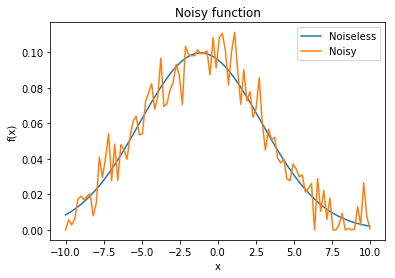

In [76]:
x = .....................................................
test_in = .....................................................
test_noisy = .....................................................

plt.figure()
plt.title("Noisy function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, ......................., label="Noiseless")
plt.plot(x, ......................., label="Noisy")
plt.legend()
plt.show()